> Shaneaka Robinson

# Project 2: Investigate a dataset from 'The Movie Database'

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project I will investiage the data from 'The Movie Database' (TMDb). This dataset contains data such as genre, release_year, cast, revenue, and budget on over 10,000 movies. As part of my investation and analysis I will answer the following questions:
>
>**Questions Posed:**
>1. What genres of movies have higher ratings?
>2. Do the genre(s) with higher ratings change over time?
>3. Does release date contribute to increased revenues?
>4. Does runtime contribute to the popularity of a movie?
>
>Throught out this process I will show the steps I've taken to characterize, clean, and analyze the data. Then I will conclude with my final resuls.


In [92]:
# import statements for all packages used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [93]:
# Reading in current data from Tbmdb and setting first column to the index column
df = pd.read_csv("tbmdb_movie_data.csv", index_col=0)
#Printing first 5 lines of data
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


>In these next 5 sections I will continue looking at the characteristics of the data. This will help me clean the data and aid in a more through and effective analysis.

In [94]:
#How many rows, cols are in this dataset
df.shape

(10866, 21)

In [95]:
#What are the characteristics of the data
df.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://www.missionimpossible.com/,Woody Allen,Based on a true story.,...,No overview found.,NaN,Comedy,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


In [96]:
#What is the type associated with each attribute in the data, which columns are missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [97]:
#Change the release date format to a date
df['release_date'] = pd.to_datetime(df['release_date'])
#Check to see if the release_date_type has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

>As part of my analysis I will be looking at both the budget and revenue and comparing these values to other variables. Therefore, I would like to gain some insight on both of these datasets. In this next section I will be doing some discovery on the budget and revenue data.

In [98]:
num_zero_budget = df.groupby('budget').count()['id']
print(num_zero_budget.head(2))

num_zero_revenue = df.groupby('revenue_adj').count()['id']
print(num_zero_revenue.head(2))

budget
0    5696
1       4
Name: id, dtype: int64
revenue_adj
0.000000    6016
2.370705       1
Name: id, dtype: int64


### Data Cleaning
>In these next few sections I will clean the data for my analysis. During this cleansing process I will be checking for duplicate rows, removing any columns that will not be needed in answering posed questions, and structuring the data for analysis.

In [99]:
#Check to see if there are any duplicates in the data
sum(df.duplicated())

1

In [100]:
#Drop duplicate rows
df.drop_duplicates(inplace=True)

In [101]:
# Dropping columns that will not be used for analysis
df.drop(['cast', 'homepage', 'production_companies', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
#Print first few lines of data with removed columns
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


>For my analysis I will be using the genres column which has some missing data. Since it was an insignificant number compared to the overall number of data points I will remove these columns in the next section.

In [102]:
#Determine number of missing data points
missing_genre = df[df['genres'].isna()]
#Remove rows with missing genres
df.dropna(subset=['genres'], inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genre(s) of movies have higher ratings?

>To support my conclusions for this question I did several characterizations and visualizations on the data:
>1. Determined the different types of movie genres
>2. Split out and exploded the movies with multiple genres split by a '|' symbol
>3. Counted the number of movies in each genre and plotted it on a bar chart
>4. Created a box plot of the genre vs the vote average
>4. Created a categorical scatterplot of genre vs the vote average

In [103]:
#What are the different genres included in this dataset
all_genres = pd.unique(df['genres'].str.split('|', expand = True).stack())
all_genres

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [104]:
#Create dataframe with movies with multiple genres on separate lines
#Reference for this next step can be found here:
#https://riptutorial.com/pandas/example/25462/split--reshape
#--csv-strings-in-columns-into-multiple-rows--having-one-element-per-row
new_df = \
(df.set_index(df.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'})
   .loc[:, df.columns]
)
new_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [105]:
#What are the characteristics of the data
new_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26955.000000,26955.000000,2.695500e+04,2.695500e+04,26955.000000,26955.000000,26955.000000,26955.000000,2.695500e+04,2.695500e+04
mean,58680.894899,0.706112,1.750781e+07,4.744365e+07,102.800408,249.999777,5.956535,2000.698423,2.103946e+07,6.088986e+07
std,86721.116560,1.114979,3.460893e+07,1.322100e+08,30.373314,638.020401,0.911927,12.764378,3.820031e+07,1.615305e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10200.000000,0.224628,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18212.000000,0.411324,1.130000e+02,0.000000e+00,99.000000,44.000000,6.000000,2005.000000,1.823126e+02,0.000000e+00
75%,58244.000000,0.774737,2.000000e+07,3.053601e+07,112.000000,173.000000,6.600000,2011.000000,2.704173e+07,4.376460e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [106]:
#Determine the number of movies categorized in each genre
genre_size = new_df['genres'].value_counts()
#Check the data
genre_size

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

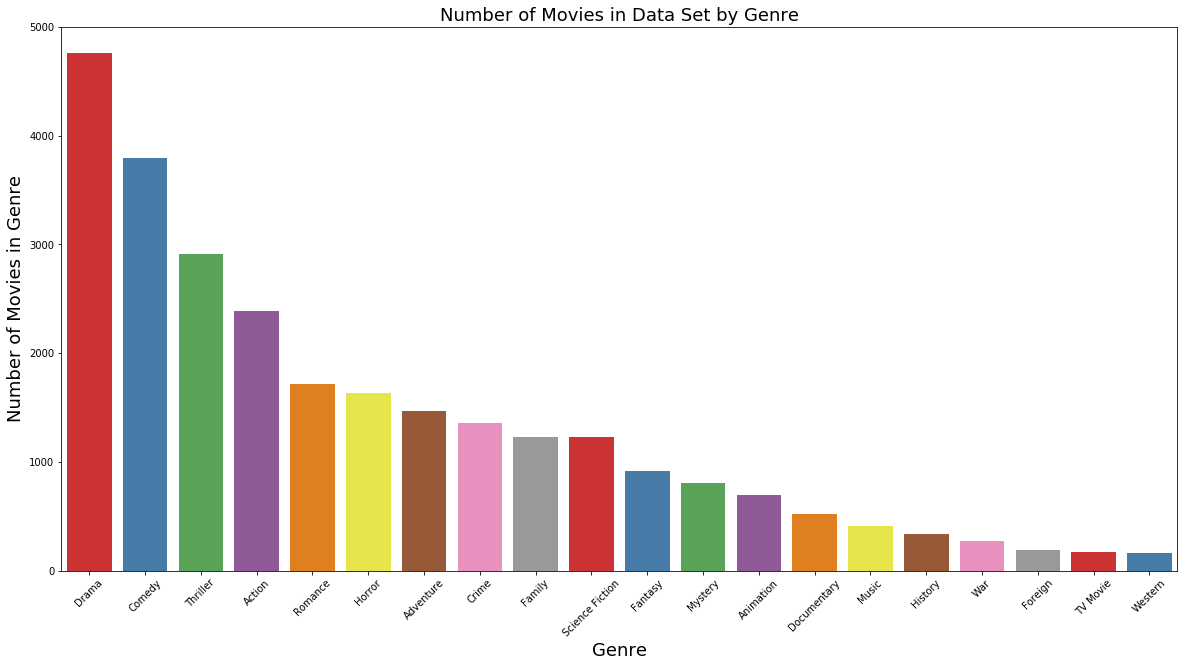

In [107]:
#Create plot for Number of Movies in Data Set by Genre
plt.figure(figsize = (20, 10))
#Plot a bar-chart of movie genres from biggest to smallest
ax=sns.countplot(x="genres", data= new_df, order = new_df['genres'].value_counts().index, palette="Set1")
#ax= plt.bar(genre_size.index, new_df['genres'].value_counts())

# Set the x-axis tick labels to the genre
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#Set the x-axis label
ax.set_xlabel('Genre', fontsize = 18)
#Set the y-axis label
ax.set_ylabel('Number of Movies in Genre', fontsize = 18)
#Set the title
ax.set_title('Number of Movies in Data Set by Genre', fontsize = 18)
#Show the plot
plt.show()

In [108]:
#Create a function to calculate the mean of the vote_average by genre
def mean_cal(new_df):
    return new_df.mean()

#Group genres by the mean of the vote average
votter_mean_by_genre = new_df.groupby('genres')['vote_average'].apply(mean_cal).reset_index(name = 'votter_avg_mean')
#Check the data
votter_mean_by_genre

,genres,votter_avg_mean
0,Action,5.787752
1,Adventure,5.940585
2,Animation,6.403147
3,Comedy,5.905167
4,Crime,6.124889
5,Documentary,6.908462
6,Drama,6.165546
7,Family,5.997563
8,Fantasy,5.863537
9,Foreign,5.981383


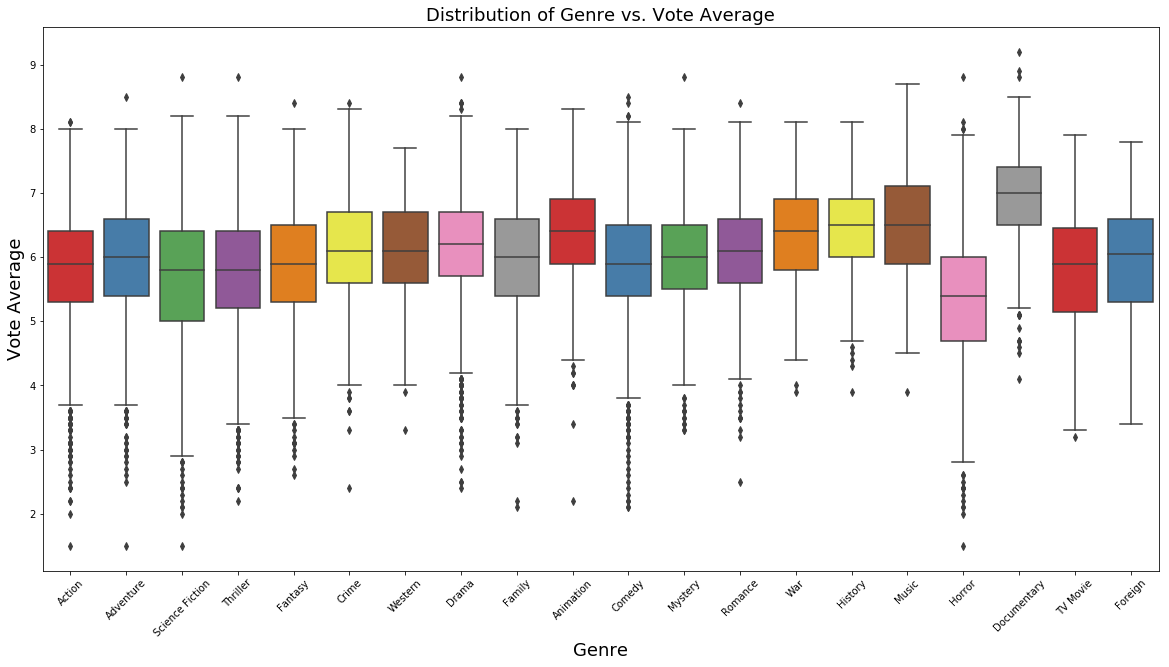

In [109]:
#Create box plot of genre vs mean
plt.figure(figsize = (20, 10))
ax = sns.boxplot(x='genres', y='vote_average', data=new_df, palette='Set1')

#Create the x-axis tick labels with the genre
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#Create the x-axis label
ax.set_xlabel('Genre', fontsize = 18)
#Create the y-axis label
ax.set_ylabel('Vote Average', fontsize = 18)
#Add the title
ax.set_title('Distribution of Genre vs. Vote Average', fontsize = 18)
#Show plot
plt.show()

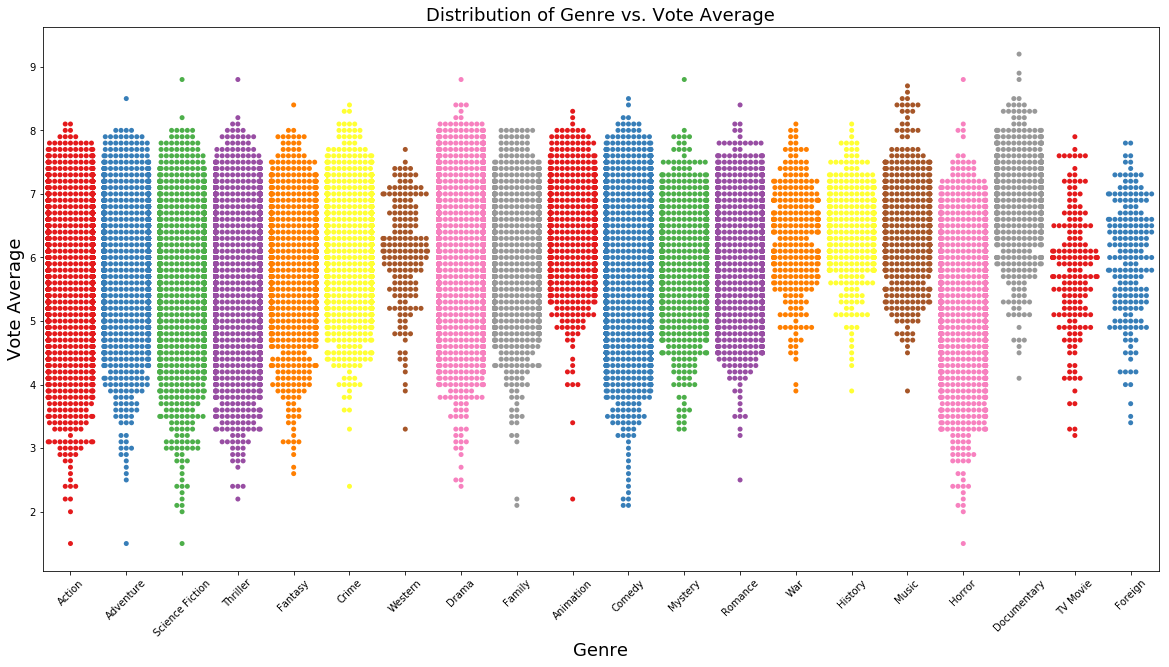

In [110]:
#Create categorical scatterplot of genre vs mean
plt.figure(figsize = (20, 10))
ax = sns.swarmplot(x='genres', y='vote_average', data=new_df, palette="Set1")

#Create the x-axis tick labels with the genre
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#Create the x-axis label
ax.set_xlabel('Genre', fontsize = 18)
#Create the y-axis label
ax.set_ylabel('Vote Average', fontsize = 18)
#Add the title
ax.set_title('Distribution of Genre vs. Vote Average', fontsize = 18)
#Show plot
plt.show()

### Research Question 2: Do the genres with higher ratings change over time?

>To support my conclusions  for this question I did several characterizations and visualizations on the data:
>1. Extracted the release month and day from the date
>2. Calculated the total number of movies released per genre by year
>3. Detemined the top 10 genres with respect to vote average 
>4.Created a bar plot with the number of movies released per year
>5. Created a bar plot with total number of movies released per genre by year 

In [111]:
#Determine the release month based on the release date column
df['release_month'] = df['release_date'].dt.month
#Determine the release day based on the release date column
df['release_day'] = df['release_date'].dt.weekday_name
#Check the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Tuesday
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Wednesday
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,Wednesday
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,Tuesday
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,Wednesday


In [112]:
#Group genres by the release year total in that year
year_genre_data = new_df.groupby('release_year')['genres'].value_counts().reset_index(name = 'year_genre_total')
#Check the data
year_genre_data.head()

,release_year,genres,year_genre_total
0,1960,Drama,13
1,1960,Action,8
2,1960,Comedy,8
3,1960,Horror,7
4,1960,Romance,6


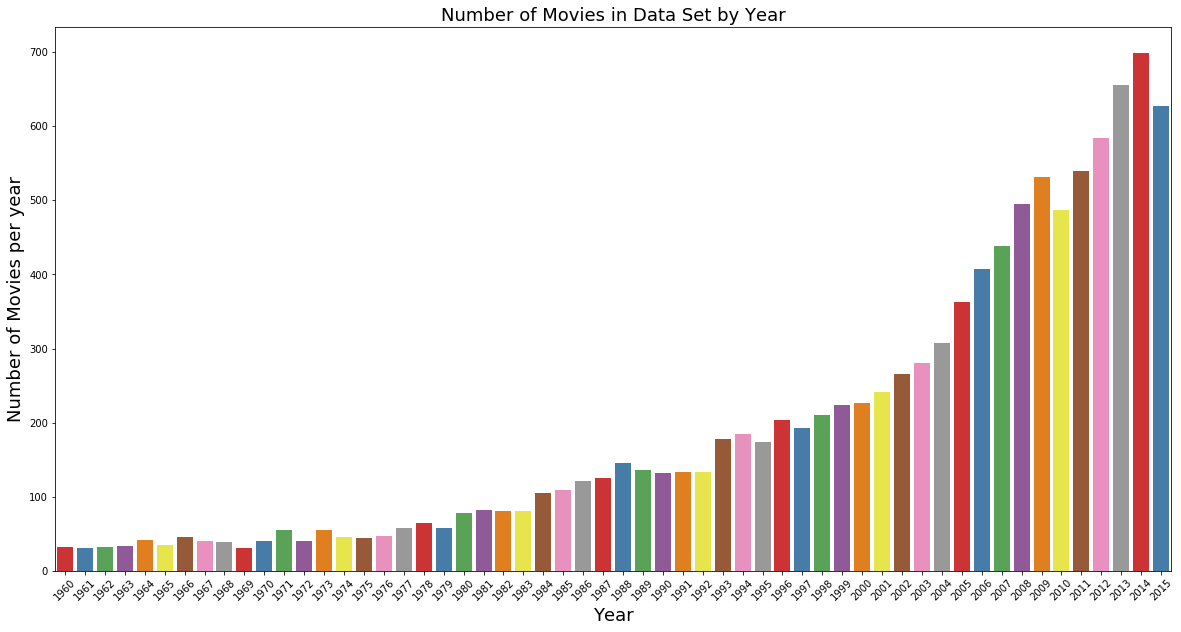

In [113]:
#Create plot for Number of Movies in Data Set by Year
plt.figure(figsize = (20, 10))
#Plot a bar-chart of num of moives in a year from biggest to smallest
#ax=sns.countplot(x="release_year", data= df, order = df['release_year'].value_counts().index[0:10], palette="Set1")
ax=sns.countplot(x="release_year", data= df, palette="Set1")

#Create the x-axis tick labels to the genre
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#Create x-axis label
ax.set_xlabel('Year', fontsize = 18)
#Create y-axis label
ax.set_ylabel('Number of Movies per year', fontsize = 18)
#Create plot title
ax.set_title('Number of Movies in Data Set by Year', fontsize = 18)
#Show plot
plt.show()

In [114]:
#Detemine the top 10 genres with respect to vote average 
votter_mean_by_genre.nlargest(10, ['votter_avg_mean'])

,genres,votter_avg_mean
5,Documentary,6.908462
12,Music,6.480392
10,History,6.410479
2,Animation,6.403147
18,War,6.297778
6,Drama,6.165546
4,Crime,6.124889
19,Western,6.083030
14,Romance,6.042874
7,Family,5.997563


In [115]:
#Create a new data frame with the top 10 genres with the higest vote average mean
new_df2 = new_df[(new_df.genres == 'Documentary') | (new_df.genres == 'War')| (new_df.genres == 'History') | \
                 (new_df.genres == 'Western') | (new_df.genres == 'Music') | (new_df.genres == 'Drama') | \
                 (new_df.genres == 'Animation') | (new_df.genres == 'Crime') | (new_df.genres == 'Mystery') | \
                 (new_df.genres == 'Romance')]
new_df2.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
16,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Crime,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
18,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
19,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Drama,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
26,286217,tt3659388,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
30,211672,tt2293640,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Animation,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09


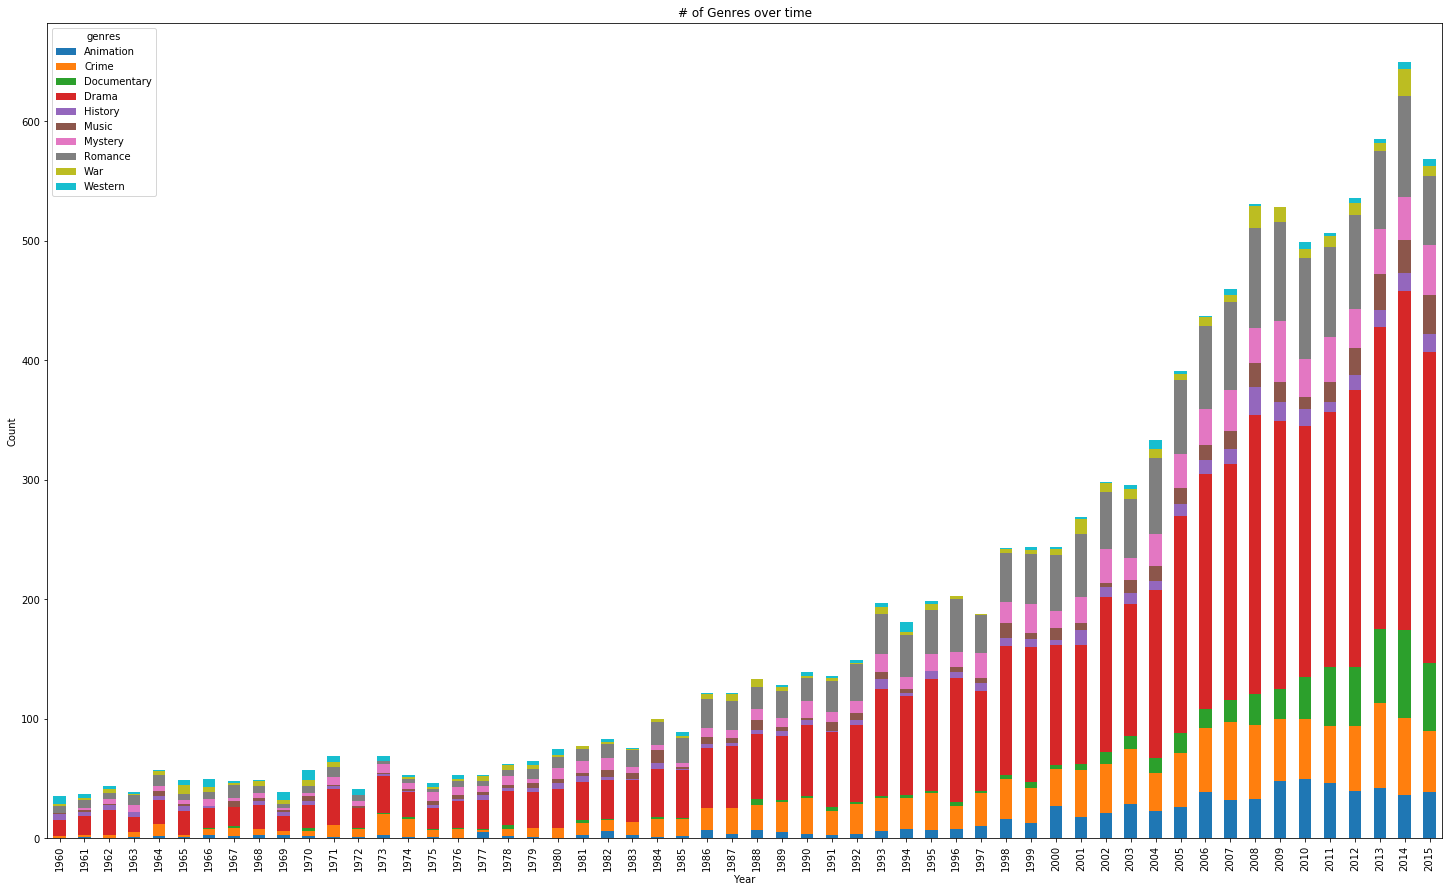

In [116]:
#Group genres by the release year total in that year
ax = new_df2.groupby(['release_year', 'genres']).size().reset_index().pivot(columns='genres', index='release_year', values=0)
#Create a bar plot
ax.plot(kind='bar', stacked=True, figsize=[25,15])

#Create y-axis label
plt.ylabel("Count")
#Create x-axis label
plt.xlabel("Year")
#Create plot title
plt.title("# of Genres over time")
#Show Plot
plt.show()

### Research Question 3: Does release date contribute to increased revenues?

>To support my conclusions for this question I did several characterizations and visualizations on the data:
>1. Dropped any rows with $0 revenue
>2. Extracted the day and the month from the release date column
>3. Summed the revenue by the release month over all years
>4. Determined the top 5 largest revenue generating months
>5. Created a pie chart with summed revenue by month over all years


In [117]:
#Create a copy of the df with the genes exploded out
new_df4 = new_df
#Drop all rows with $0 revenue
new_df4.drop(new_df4[new_df4['revenue_adj'] == 0].index, inplace = True) 
#Determine the number of $0 revenue movies
num_zero_revenue = new_df4.groupby('revenue_adj').count()['id']
#Check the data
num_zero_revenue.head()

revenue_adj
2.370705    2
2.861934    2
3.038360    5
5.926763    2
6.951084    2
Name: id, dtype: int64

In [118]:
#Determine the release month based on the release date column
new_df4['release_month'] = new_df4['release_date'].dt.month
#Determine the release day based on the release date column
new_df4['release_day'] = new_df4['release_date'].dt.weekday_name
#Check the data
new_df4.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Tuesday
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Tuesday
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Tuesday
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Tuesday
4,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Wednesday


In [119]:
#What is the type associated with each attribute in the data
new_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12664 entries, 0 to 26909
Data columns (total 17 columns):
id                12664 non-null int64
imdb_id           12664 non-null object
popularity        12664 non-null float64
budget            12664 non-null int64
revenue           12664 non-null int64
original_title    12664 non-null object
director          12660 non-null object
runtime           12664 non-null int64
genres            12664 non-null object
release_date      12664 non-null datetime64[ns]
vote_count        12664 non-null int64
vote_average      12664 non-null float64
release_year      12664 non-null int64
budget_adj        12664 non-null float64
revenue_adj       12664 non-null float64
release_month     12664 non-null int64
release_day       12664 non-null object
dtypes: datetime64[ns](1), float64(4), int64(7), object(5)
memory usage: 1.7+ MB


In [120]:
#Group revenue_adj by the release month totals for the month over all years
adj_revenue_sum_by_month = new_df4.groupby('release_month')['revenue_adj'].sum().reset_index(name = 'adj_revenue_by_month')
#Check the data
adj_revenue_sum_by_month

,release_month,adj_revenue_by_month
0,1,4.991586e+10
1,2,6.409991e+10
2,3,1.196457e+11
3,4,9.453039e+10
4,5,1.840905e+11
5,6,2.502923e+11
6,7,1.817735e+11
7,8,9.196236e+10
8,9,8.596946e+10
9,10,1.092844e+11


In [121]:
#Determine the top 5 largest revenue generating months
adj_revenue_sum_by_month.nlargest(5, ['adj_revenue_by_month'])

,release_month,adj_revenue_by_month
5,6,2.502923e+11
11,12,2.348898e+11
4,5,1.840905e+11
6,7,1.817735e+11
10,11,1.748320e+11


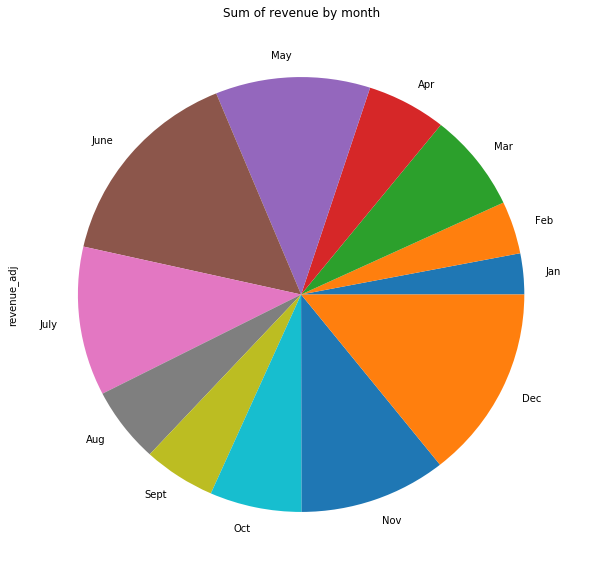

In [122]:
#Create a list with the months for labelling pie chart
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
#Create pie chart with revenue_adj totals by month
new_df4.groupby('release_month')['revenue_adj'].sum().plot(kind='pie', labels= months, figsize=(10,10));
#Create title label
plt.title("Sum of revenue by month")
#Show Plot
plt.show()

In [123]:
#Determine the number of movies released every year in dataset
year_total = df['release_year'].value_counts()
#Check the data
year_total.head()

2014    699
2013    656
2015    627
2012    584
2011    540
Name: release_year, dtype: int64

In [124]:
#Determine the number of movies released every year in dataset
year_genre_data = new_df.groupby('release_year')['genres'].value_counts().reset_index(name = 'year_genre_total')
#Check the data
year_genre_data.head()

,release_year,genres,year_genre_total
0,1960,Comedy,4
1,1960,Drama,4
2,1960,Romance,3
3,1960,Action,2
4,1960,Adventure,1


### Research Question 4: Does runtime contribute to the popularity of a movie?

>To support my conclutions for this question I did the following:
>1. Calculated the correlation of the columns
>2. Used a swarmplot plot to show the spread of the runtime vs. the vote average

In [125]:
#Calculate the correlation of columns
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
id,1.000000,-0.013371,-0.140752,-0.098793,-0.086702,-0.034908,-0.060599,0.511300,-0.188485,-0.138126,0.039927
popularity,-0.013371,1.000000,0.545271,0.663268,0.138433,0.800786,0.210432,0.090200,0.513311,0.608964,0.043311
budget,-0.140752,0.545271,1.000000,0.734851,0.191079,0.632601,0.081729,0.116312,0.968949,0.622406,0.040945
revenue,-0.098793,0.663268,0.734851,1.000000,0.162755,0.791122,0.173254,0.057324,0.706360,0.919088,0.038930
runtime,-0.086702,0.138433,0.191079,0.162755,1.000000,0.163187,0.158033,-0.117665,0.220955,0.175615,0.070160
vote_count,-0.034908,0.800786,0.632601,0.791122,0.163187,1.000000,0.254698,0.108275,0.586923,0.707865,0.026303
vote_average,-0.060599,0.210432,0.081729,0.173254,0.158033,0.254698,1.000000,-0.119851,0.093811,0.193836,0.072731
release_year,0.511300,0.090200,0.116312,0.057324,-0.117665,0.108275,-0.119851,1.000000,0.017076,-0.066118,-0.047945
budget_adj,-0.188485,0.513311,0.968949,0.706360,0.220955,0.586923,0.093811,0.017076,1.000000,0.646507,0.056778
revenue_adj,-0.138126,0.608964,0.622406,0.919088,0.175615,0.707865,0.193836,-0.066118,0.646507,1.000000,0.050711


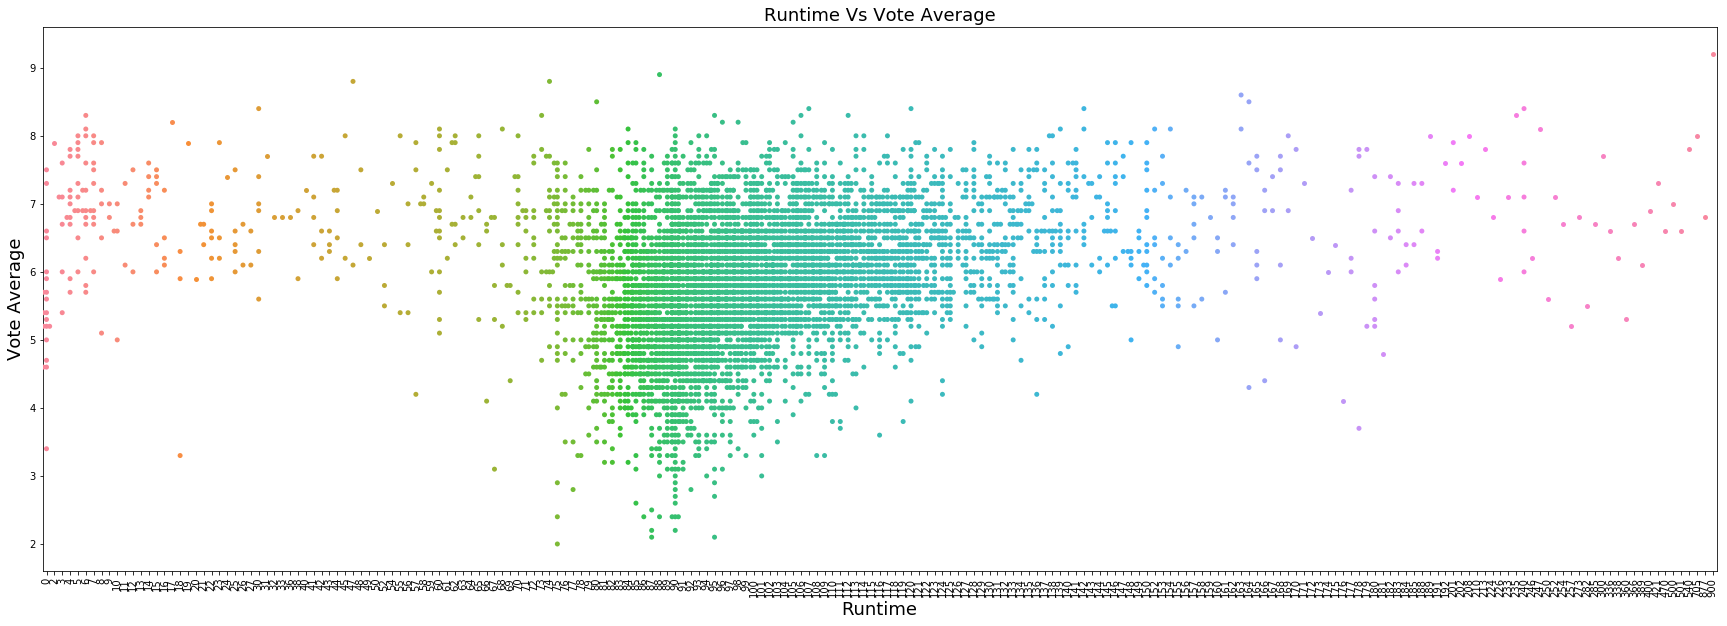

In [126]:
#Create plot size
plt.figure(figsize = (30,10))
#Generate swarmplot based on runtime vs vote_average
ax = sns.swarmplot(x = 'runtime', y = 'vote_average', data = df[0:5000]);

#Create x-axis ticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#Create x-axis label
ax.set_xlabel('Runtime', fontsize = 18); 
#Create y-axis label
ax.set_ylabel('Vote Average', fontsize = 18);
#Create plot title
ax.set_title('Runtime Vs Vote Average',fontsize = 18);

<a id='conclusions'></a>
## Conclusions

>As part of my investigation I was set on answering the following questions:
>1. What genre(s) of movies have higher ratings?

>Based on analysis of the box plot generated I would conclude that Documentaries have higher ratings. This may in part be due to the dataset for Documentaries being much smaller. However, Documentaries that are released on average are rated high. As for the movie genres with a much higher datasets, there aren’t any that significantly stand out with an average of higher ratings. This can be concluded from both the calculation of the mean and the analysis of the box plot.

>2. Do genres with higher ratings change over time?

>There appears to be a linear relationship between time and the number of movies released by genre over time. Therefore it is hard to say if genres with higher ratings change over time. However based on the stacked bar chart it doesn't appear that there has been a significant increase in Documentaries which have the highest vote average mean.

>3. Does release date contribute to increased revenues?

>There doesnt appear to be any corrleation between the release month and the reveune generated. However it can be observed from the pie chart that the months of June and December generate the highest revenues.
 

>4. Does runtime contribute to the popularity of a movie?

>As a final analysis I calculated the correlation of the dataset. Based on Green Belt Training that I've received in the past I know that a general rule for correlation coefficients (r) > 0.80 or (r) < -0.80 is significant. Based on this rule, the correlation analysis suggests that there is not a + or – relationship between the runtime and the popularity. This is shown in both the calculation of the correlation of the dataset and they swarmplot of the runtime vs. vote average.


## Limitations

>Significant (roughly half) amount of budget and revenue data are 0.
>While 23 movies did not have a genre associated with them removing these line items did not have an impact on the over all dataset.

In [128]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0